# GRCh38 reference update for use by GIAB

Prepared by Jennifer McDaniel  
September 7-18, 2023

In [5]:
# JMcDaniel working directory
pwd

/Users/jmcdani/Documents/reference-update


## Purpose and background 
Refine GRCh38 reference used for GIAB work by correcting some GRCh38 reference errors.  This will be the third version of the GRCh38 reference modified and used by the GIAB. 

New Reference Full Name: `GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta.gz`  
New Reference abbreviated name for inclusion in filenames: `GRCh38-GIABv3`

The refinement will correct errors in GRCh38 that were discovered in comparisons with the T2T-CHM13 reference from the [FixItFelix paper](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-023-02863-7) and by users of GRCh38 discussed in [GRC blog post](http://genomeref.blogspot.com/2021/07/one-of-these-things-doest-belong.html).  Relative to CHM13 it was found that GRCh38 had duplicated and collapsed regions. For this reason we will mask GRC-identified GRCh38 false duplications and add decoy sequences for collapsed genic regions identified in the FixItFelix paper.  While the FixItFelix modified reference contains masked duplications and decoys, the masking does not completely follow that of GRC.  For this reason we will use GRC exclusions to hard mask duplications and pull the decoy sequences from the FixItFelix modified reference fasta to refine the `GCA_000001405.15_GRCh38_no_alt_analysis_set` reference .  The GRC exclusions also will mask non-human contaminating sequence.  Futher, non-ACTGN contained in the reference will be hard masked as Ns.

## Features of new reference
- starting GRC reference for hg38 `GCA_000001405.15_GRCh38_no_alt_analysis_set.fasta.gz`
- hard masks false duplications and contaminating non-human sequence using `GCA_000001405.15_GRCh38_GRC_exclusions.bed`
- includes decoy sequence for *MAP2K3*, *KMT2C* and *KCNJ18*
- hard masks non-ACTGN bases

## Resources
[GCA_000001405.15_GRCh38_no_alt_analysis_set.fasta.gz](https://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/release/references/GRCh38/GCA_000001405.15_GRCh38_no_alt_analysis_set.fasta.gz)  
Starting GRCh38 reference currently used by GIAB  

[GCA_000001405.15_GRCh38_GRC_exclusions.bed](https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.39_GRCh38.p13/GRCh38_major_release_seqs_for_alignment_pipelines/GCA_000001405.15_GRCh38_GRC_exclusions.bed)  
GRC exclusions bed file containing false duplication and contaminating sequence in GRCh38

[GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2.fasta.gz](https://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/release/references/GRCh38/GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2.fasta.gz)  
FixItFelix modified GRCh38 reference that contains decoy sequences

## 1. Standarize formatting between references
formatting differences between (a)`GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2.fasta` and (b)`GCA_000001405.15_GRCh38_no_alt_analysis_set.fasta`  

**headers are different e.g.**  
(a) >chr1  
(b) >chr1 AC:CM000663.2 gi:568336023 LN:248956422 rl:Chromosome M5:6aef897c3d6ff0c78aff06ac189178dd AS:GRCh38 

**sequence format different**  
(a) sequence on single line  
(b) sequences wrapped, 70 char/line

#### Wrap FixItFelix ref sequence to 70 characters/line
J.Zook would like to match GRC formatting and use sequence wrap (sequence on multiple lines)

Using FASTA/Q processing tools, [seqkit](https://bioinf.shenwei.me/seqkit/) available through Bioconda.  
Note: Unix command `fold -w 70` could also be used. However if headers are over 70 characters, headers would also be wrapped. In the case of this ref headers are less than 70 char.

Wrap will be peformed on decoy sequence fasta to simply. See step 3.

#### Shorten GRC ref headers
Since we will be masking the reference information included in the headers will no longer directly apply to the sequences.  We have decided to shorten the headers in the GRC ref to just the chromosome.  Doing so will make the headers consistent with headers in FixItFelix reference. 

Parsed FASTA header using python script ('fasta_header_parse.py') generated by chatGPT v3.5:  

If the line starts with >, it removes leading and trailing whitespace using strip() and then splits the line into words using split(maxsplit=1). The maxsplit=1 argument ensures that only one split is performed, which is more efficient when dealing with very long lines. Finally, [0] retrieves the first word, which is expected to contain the chromosome name.

The code essentially reads the input file line by line, processes each line accordingly, and writes the modified header lines (with only the chromosome name) and non-header lines to the output file. This approach is memory-efficient and suitable for processing large files efficiently.

In [1]:
#run using python kernel

from datetime import date
print(date.today())

input_file = "GCA_000001405.15_GRCh38_no_alt_analysis_set.fasta"
output_file = "GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader.fasta"

with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    for line in infile:
        if line.startswith('>'):
            header = line.strip().split(maxsplit=1)[0]  # Extract the chromosome name
            outfile.write(header + "\n")  # Write the modified header to the output file
        else:
            outfile.write(line)  # Write non-header lines as is
infile.close()
outfile.close()

#check that number of lines has not changed
with open ("GCA_000001405.15_GRCh38_no_alt_analysis_set.fasta") as ref, open("GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader.fasta") as sHref:
	lines = len(ref.readlines())
	shlines = len(sHref.readlines())
	print("original ref: ", lines)
	print("short header ref: ", lines)
ref.close()
sHref.close()

2023-09-12
original ref:  44284892
short header ref:  44284892


In [1]:
#spot check that headers were updated
echo "original reference"
grep '^>' "GCA_000001405.15_GRCh38_no_alt_analysis_set.fasta" | head -n 3
grep '^>' "GCA_000001405.15_GRCh38_no_alt_analysis_set.fasta" | tail -n 3
echo "reference with headers shortened"
grep '^>' "GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader.fasta" | head -n 3
grep '^>' "GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader.fasta" | tail -n 3

original reference
>chr1  AC:CM000663.2  gi:568336023  LN:248956422  rl:Chromosome  M5:6aef897c3d6ff0c78aff06ac189178dd  AS:GRCh38
>chr2  AC:CM000664.2  gi:568336022  LN:242193529  rl:Chromosome  M5:f98db672eb0993dcfdabafe2a882905c  AS:GRCh38
>chr3  AC:CM000665.2  gi:568336021  LN:198295559  rl:Chromosome  M5:76635a41ea913a405ded820447d067b0  AS:GRCh38
>chrUn_GL000216v2  AC:GL000216.2  gi:568335254  LN:176608  rl:unplaced  M5:725009a7e3f5b78752b68afa922c090c  AS:GRCh38
>chrUn_GL000218v1  AC:GL000218.1  gi:224183305  LN:161147  rl:unplaced  M5:1d708b54644c26c7e01c2dad5426d38c  AS:GRCh38
>chrEBV  AC:AJ507799.2  gi:86261677  LN:171823  rl:decoy  M5:6743bd63b3ff2b5b8985d8933c53290a  SP:Human_herpesvirus_4  tp:circular
reference with headers shortened
>chr1
>chr2
>chr3
>chrUn_GL000216v2
>chrUn_GL000218v1
>chrEBV


In [2]:
# index shortened header fasta using samtools 1.17
date
samtools faidx GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader.fasta

Tue Sep 12 10:13:04 EDT 2023


## 2. Prepare GRC exclusions bed  
GRC exclusion represent regions in GRCh38 that have been identified by the community as falsely duplicated.  In lieu of generating a completely new GRCh38 reference GRC has provided an exclusion file denoting regions of false duplications.  We will use this bed to mask (replace sequence with Ns) these regions. These also include regions that are duplicated in in GRCh38 relative to T2T-CHM13.   
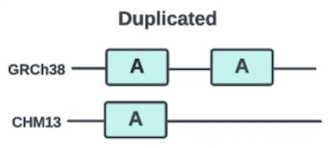  
Fig.1A from FixItFelix paper

Notes from J.Zook regarding two regions where he doesn't not completely agree with entire exclusion however for simplicity believes we should be consistent with GRC and mask:

**chr13:111,753,855-111,793,441 False Duplication**  
GRC excludes this entire region however, there is an ~4kb region (shown in IGV screen shot below) at the right end of this duplication that does appear to be real in HG002. Using IGV and BLAT, he found that this region does not map anywhere else giving confidence this region is real in HG002.  Alhtough it migth be correct, leaving this short region in might lead to issue with long read alignments since region is flanked by gaps in the reference.  
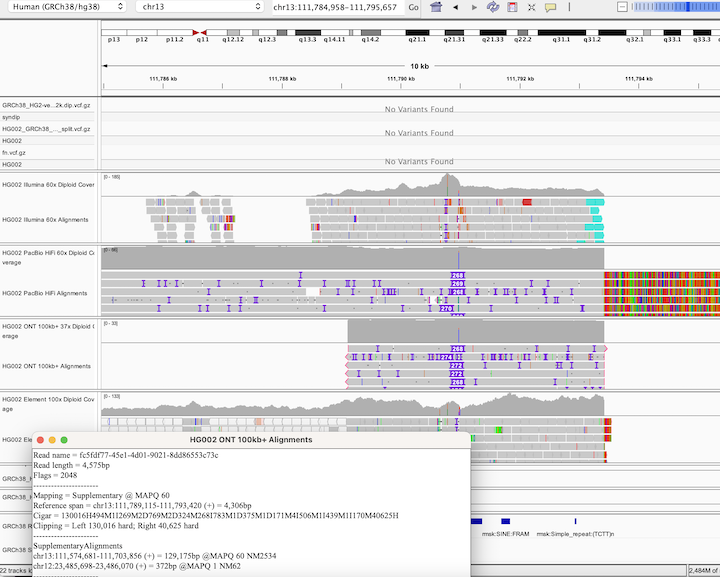

**chr16:34,456,556-34,521,510 in multicopy segdup**  
GRC excludes this entire region however it was found that CHM13, along with other individuals, might have different copy numbers of segdups and that other individiual were more similar to CHM13 than hg38.  
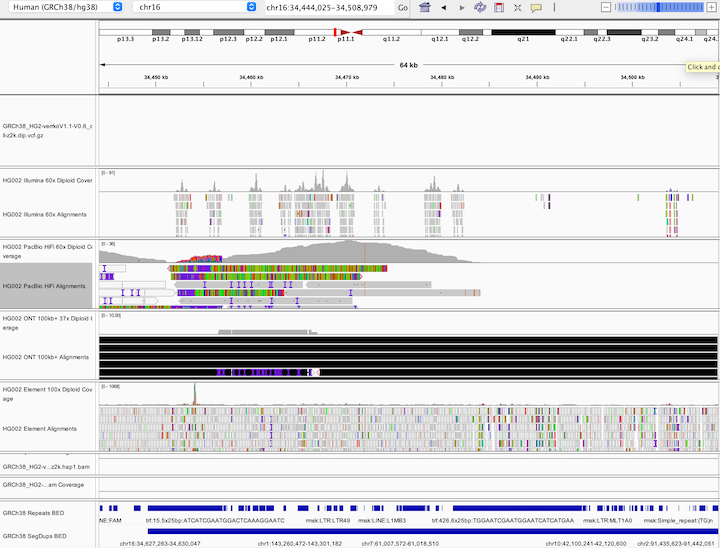

#### remove header from exclusion bed

In [3]:
date
grep '^chr' GCA_000001405.15_GRCh38_GRC_exclusions.bed  > GCA_000001405.15_GRCh38_GRC_exclusions_noHeader.bed

wc -l GCA_000001405.15_GRCh38_GRC_exclusions.bed
wc -l GCA_000001405.15_GRCh38_GRC_exclusions_noHeader.bed

Tue Sep 12 10:13:54 EDT 2023
      18 GCA_000001405.15_GRCh38_GRC_exclusions.bed
      14 GCA_000001405.15_GRCh38_GRC_exclusions_noHeader.bed


#### sort noHeader exclusion bed

In [4]:
#remove `chr10_KI270825v1_alt	0	188315	contamination` from exclusion bed since reference we are using does not include alts. 
date
grep -v "._alt" GCA_000001405.15_GRCh38_GRC_exclusions_noHeader.bed > GCA_000001405.15_GRCh38_GRC_exclusions_noHeader_noAlt.bed

wc -l GCA_000001405.15_GRCh38_GRC_exclusions_noHeader.bed
wc -l GCA_000001405.15_GRCh38_GRC_exclusions_noHeader_noAlt.bed

Tue Sep 12 10:14:04 EDT 2023
      14 GCA_000001405.15_GRCh38_GRC_exclusions_noHeader.bed
      13 GCA_000001405.15_GRCh38_GRC_exclusions_noHeader_noAlt.bed


In [5]:
#sort using order for reference fai
date
bedtools sort -faidx GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader.fasta.fai -i GCA_000001405.15_GRCh38_GRC_exclusions_noHeader_noAlt.bed > GCA_000001405.15_GRCh38_GRC_exclusions_noHeader_noAlt_sorted.bed

#check noHeader output
cat GCA_000001405.15_GRCh38_GRC_exclusions_noHeader_noAlt_sorted.bed 

Tue Sep 12 10:14:17 EDT 2023
chr9	70701801	70719794	false_duplication
chr13	86252979	86269524	false_duplication
chr13	111753855	111793441	false_duplication
chr16	34339329	34521510	false_duplication
chr21	5010000	5166246	false_duplication
chr21	5966593	6161371	false_duplication
chr21	6427258	6580181	false_duplication
chr21	6789085	6934219	false_duplication
chr21	7743700	7865746	false_duplication
chrX	37085008	37099262	false_duplication
chr11_KI270721v1_random	0	100316	false_duplication
chr22_KI270734v1_random	0	165050	false_duplication
chrUn_KI270752v1	0	27745	contamination


## 3. Pull decoy sequences from FixItFelix modified reference
Decoys will be added to address regions in GRCh38 that are collapsed in GRCh38 relative to T2T-CHM13. Final decoy contigs added to their modified reference are for *MAP2K3*, *KCNJ18* and *KMT2C*.  
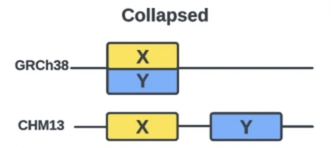  
Fig.1A from FixItFelix paper

**Text from FixItFelix paper describing down-selection selection of decoys in modified reference:**

"We created reference decoys for ten genic regions with evidence of GRCh38 collapsed duplications (TAS2R46, MAP2K3, KCNJ18, KATNAL2, FANCD2, LPA, MUC3A, KMT2C, GPRIN2, and DUSP22).

We chose not to include TAS2R46, KATNAL2, LPA, and MUC3A because they did not have simple decoy sequences that could be added.

While most parts of the FANCD2, DUSP22, and GPRIN2 genes affected by these decoys appear to be improved, these regions are more complicated and some regions in and around these genes may have performance reduced by the decoys."

#### create list of headers for decoy sequences

In [6]:
date
grep '^>MAP2K3.' GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2.fasta > GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2_decoysHeaders.txt
grep '^>KCNJ18.' GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2.fasta >> GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2_decoysHeaders.txt
grep '^>KMT2C.' GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2.fasta >> GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2_decoysHeaders.txt

cat GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2_decoysHeaders.txt

Tue Sep 12 10:14:45 EDT 2023
>MAP2K3_chr17_22578583_22605165
>KCNJ18_chr17_22629421_22688415
>KMT2C_chr21_7687010_7731520
>KMT2C_chr15_6020392_6062903
>KMT2C_chr13_14464876_14502703
>KMT2C_chr13_14211849_14228603
>KMT2C_chr13_10688343_10754814
>KMT2C_chr13_10744786_10790087
>KMT2C_chr13_11526357_11569988
>KMT2C_chr13_11559977_11592630
>KMT2C_chr13_14408161_14474907
>KMT2C_chr14_3553442_3620349
>KMT2C_chr14_3610318_3640421
>KMT2C_chr15_5960377_6027329
>KMT2C_chr2_89596961_89613143
>KMT2C_chr2_90170767_90210396
>KMT2C_chr21_7659652_7674726
>KMT2C_chr21_8616365_8659521
>KMT2C_chr21_8649510_8682182
>KMT2C_chr22_6626735_6693166
>KMT2C_chr22_6683135_6713219
>KMT2C_chr22_11126384_11167180
>KMT2C_chr22_11157169_11189815


#### pull decoy sequences from fasta using file of decoy headers
grep command:  
-A1 pull header and one line below (sequence)  
-w looks for exact match in decoy header text file  
-f uses decoy header text file

In [8]:
date
grep -A1 -w -f GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2_decoysHeaders.txt GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2.fasta > GRCh38_masked_v2_decoyONLY.fasta

#excpect 46
wc -l GRCh38_masked_v2_decoyONLY.fasta
#expect 23
wc -l GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2_decoysHeaders.txt

Tue Sep 12 10:18:00 EDT 2023
      46 GRCh38_masked_v2_decoyONLY.fasta
      23 GRCh38_masked_v2_decoy_excludes_GPRIN2_DUSP22_FANCD2_decoysHeaders.txt


In [9]:
date
seqkit version
seqkit seq GRCh38_masked_v2_decoyONLY.fasta -w 70 > GRCh38_masked_v2_decoyONLY_wrapped.fasta

#confirm input and outputs
wc -l GRCh38_masked_v2_decoyONLY.fasta
#expect significant increase, thousands of lines
wc -l GRCh38_masked_v2_decoyONLY_wrapped.fasta

Tue Sep 12 10:19:00 EDT 2023
seqkit v2.5.1
      46 GRCh38_masked_v2_decoyONLY.fasta
   13787 GRCh38_masked_v2_decoyONLY_wrapped.fasta


## 4. Prepare final GIAB hg38 reference

#### mask GRCh38 reference with sorted GRC exclusion bed file   
[bedtools maskfasta](https://bedtools.readthedocs.io/en/latest/content/tools/maskfasta.html)

In [2]:
bedtools --version

bedtools v2.31.0


In [10]:
date
bedtools maskfasta -fi GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader.fasta -bed GCA_000001405.15_GRCh38_GRC_exclusions_noHeader_noAlt_sorted.bed -fo GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked.fasta

#confirm masking doesn't remove lines in file
wc -l GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader.fasta
wc -l GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked.fasta

Tue Sep 12 10:19:52 EDT 2023
 44284892 GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader.fasta
 44284892 GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked.fasta


#### add decoy contigs pulled from FixItFelix modified reference

In [11]:
#concatenate decoys to orginal reference
date
cat GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked.fasta GRCh38_masked_v2_decoyONLY_wrapped.fasta > GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked_withDecoys.fasta

#output should be  13787 + 44284892 = 44298679
wc -l GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked_withDecoys.fasta

Tue Sep 12 10:21:24 EDT 2023
 44298679 GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked_withDecoys.fasta


#### mask non-ACTGNs in reference 
script saved as `mask_nonACTGN.py`

In [1]:
# run using python kernal

from datetime import date
print(date.today())

import re # import regular expresion module

# Use regular expression to replace non-ACTGN characters with 'N'
def replace_non_acgtn_characters(line):
    #new line character needed in check other N would be inserted
    return re.sub(r'[^\nACTGN]', 'N', line)

input_file = 'GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked_withDecoys.fasta'
output_file = 'GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked_withDecoys_non-ACTGNmasked.fasta'

# Open the input and output files
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        # Check if it is a header line starts with ">", if so ignore
        if line.startswith(">"):
            # If it starts with ">", write it as is
            outfile.write(line)
        else:
            # Process non-header lines: replace characters
            new_line = replace_non_acgtn_characters(line)
            outfile.write(new_line)
            
infile.close()
outfile.close()

2023-09-12


#### QC

In [1]:
echo 'FASTA stats comparison'
seqkit stats -a -T GCA_000001405.15_GRCh38_no_alt_analysis_set.fasta | csvtk pretty -S 3line -H
seqkit stats -a -T GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked_withDecoys_non-ACTGNmasked.fasta | csvtk pretty -S 3line -H
echo ''

echo 'confirm decoys got inserted properly'
grep -C2 "^>MAP2K3" GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked_withDecoys_non-ACTGNmasked.fasta
tail -n3 GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked_withDecoys_non-ACTGNmasked.fasta
echo ''

echo 'check nonACTGN replacements by counting # of Ns, Ns should increase'
grep 'N' GCA_000001405.15_GRCh38_no_alt_analysis_set.fasta | wc -m
grep 'N' GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked_withDecoys.fasta | wc -m
grep 'N' GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked_withDecoys_non-ACTGNmasked.fasta | wc -m
echo ''

echo 'check order of chromosomes/scaffold and that masked did not disrupt headers'
grep '^>' GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked_withDecoys_non-ACTGNmasked.fasta

FASTA stats comparison
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
 file	format	type	num_seqs	sum_len	min_len	avg_len	max_len	Q1	Q2	Q3	sum_gap	N50	Q20(%)	Q30(%)	GC(%)                                                                     
 GCA_000001405.15_GRCh38_no_alt_analysis_set.fasta	FASTA	DNA	195	3099922541	970	15897038.7	248956422	1997.0	32032.0	166761.0	0	145138636	0.00	0.00	38.70                
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
 file	format	type	num_seqs	sum_len	min_len	avg_len	max_len	Q1	Q2	Q3	sum_gap	N50	Q20(%)	Q30(%)	GC(%)                                

#### final formatting for release

In [2]:
date
#rename to final release name
mv GCA_000001405.15_GRCh38_no_alt_analysis_set_shortHeader_masked_withDecoys_non-ACTGNmasked.fasta GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta

Tue Sep 12 15:35:00 EDT 2023


In [3]:
date
#zip new reference
bgzip -i -c GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta > GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta.gz

Tue Sep 12 15:35:23 EDT 2023


In [4]:
date
#index refined reference
samtools faidx GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta.gz

Tue Sep 12 15:41:05 EDT 2023


#### md5s for final files

In [5]:
date 
md5 GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta
md5 GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta.gz
md5 GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta.gz.gzi
md5 GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta.gz.fai

Tue Sep 12 15:41:44 EDT 2023
MD5 (GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta) = 99be410b684e3fdb04ba67d98adba249
MD5 (GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta.gz) = 939ce19062d1462c09b88c55faca4d76
MD5 (GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta.gz.gzi) = 85428516cf66b82ebed3b58dedf05b85
MD5 (GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta.gz.fai) = a5bf6abc1f5efecc0a510f3120d08a3b


## 5. QC with mapping using Nisaba cluster
See notes on BBD_Human_Genomics team Google drive [Mapping QC of GRCh38-GIABv3 Reference](https://docs.google.com/document/d/1b5zJXoCqVNR_-V8ZuX7nErS2D69rGD6bNh1euIa2CG0/edit)

**Summary of QC results**

Methods:  
JZook and I looked at previously mapped (.bams-NIST and .crams-BCM) files to GRCh38 compared with mapping to GRCh38-GIABv3 using IGV and hg38 ref. 

We looked at the following:
- medically relevant genes that should show improved mapping (KCNE1, CRYAA, CBS, H19)
- collapsed from fix it felix and KMT2C and KCNJ12 collapsed duplications
- GRCh38 exclusions

Results:  
Mapping has improved for CMRG genes and collapsed duplications in general. JZook noted in KMT2C some high coverage regions remain because of differences between individuals. Also confirmed regions that were masked by GRCh38 exclusion bed were indeed masked, no mapping to these regions. 